Mushroom Classification Project
DTSC 680: Patrick Foran

This notebook and project build a machine learning model to predict whether mushrooms are edible or poisonous based on their features. First, a neural network will be trained using One-Hot Encoded data, and then on PCA-reduced data. The models will be compared with training times and with confusion matrices. 

The project will follow a few key steps:
- Data preprocessing: Manual assignment of column names due to formatting issues with .names file. Label encoding of target values and one- hot encoding categorical features.
- Neural Network Training: Creating and training of two-layered dequentail neural network using both full feature and PCA-reduced data. 
- Dimensionality Reduction: Application of PCA to increase efficiency while preserving variance.
- Model Evaluation: Analysis via confusion matrices and run time. 
- Documentation: Comments on the code and answers to concept questions.


In [1]:
import pandas as pd

In [2]:
# Load the .names file, get column names
with open('/Users/patrickforan/DTSC680/mushroom_classification/agaricus-lepiota.names', 'r') as f:
    lines = f.readlines()

# The first column is 'class', followed by feature names parsed from the .names file
column_names = ['class'] + [line.strip().split(':')[0] for line in lines if ':' in line]

# Load the CSV data with the extracted column names
data = pd.read_csv('/Users/patrickforan/DTSC680/mushroom_classification/agaricus-lepiota.csv', header=None, names=column_names)

# View columns
data.head()


,class,1. Title,2. Sources,"American Mushrooms (1981). G. H. Lincoff (Pres.), New York",(b) Donor,(c) Date,3. Past Usage,--- STAGGER,"Ann Arbor, Michigan","from training data using backpropagation networks, in",...,19. ring-type,20. spore-print-color,21. population,22. habitat,8. Missing Attribute Values,attribute #11. <<DTSC-680 Students,9. Class Distribution,-- edible,-- poisonous,-- total
0,p,x,s,n,t,p,f,c,n,k,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e,x,s,y,t,a,f,c,b,k,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e,b,s,w,t,l,f,c,b,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,p,x,y,w,t,p,f,c,n,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e,x,s,g,f,n,f,w,b,k,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Manually create and insert column names, .names file was poorly formatted and cumbersome.  
column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]

data = pd.read_csv('/Users/patrickforan/DTSC680/mushroom_classification/agaricus-lepiota.csv', header=None, names=column_names)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#Train Test Split
from sklearn.model_selection import train_test_split

#Seperate target and features. 
X = data.drop('class', axis=1)
y = data['class']

#Split the data 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit on y_train , transfrom both

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Check mapping
label_encoder.classes_


array(['e', 'p'], dtype=object)

In [6]:
#One-Hot Encode features
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)


# Align columns in case missing categories

X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

In [7]:

# Checkpoint
print('Number of original features:', X.shape[1])
print('Number of features after encoding:', X_train_encoded.shape[1])


Number of original features: 22
Number of features after encoding: 116


In [8]:
#Sequential Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Set up input dimensions
input_dim = X_train_encoded.shape[1]



In [9]:
%%time
# %%time, first line in cell


# Define Model
model = Sequential([
    Dense(16, activation='relu', input_dim=input_dim),
    Dense(1, activation='sigmoid')
])


# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train_encoded, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)


Metal device set to: Apple M3 Pro
Epoch 1/10


2025-04-25 13:11:19.415905: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-25 13:11:19.416123: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-04-25 13:11:19.588933: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  1/163 [..............................] - ETA: 52s - loss: 0.7248 - accuracy: 0.5312

2025-04-25 13:11:19.744852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


163/163 [==============================] - 1s 5ms/step - loss: 0.3218 - accuracy: 0.8832 - val_loss: 0.1247 - val_accuracy: 0.9608
Epoch 2/10
  1/163 [..............................] - ETA: 0s - loss: 0.1276 - accuracy: 0.9688

2025-04-25 13:11:20.640707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


163/163 [==============================] - 1s 3ms/step - loss: 0.0740 - accuracy: 0.9844 - val_loss: 0.0476 - val_accuracy: 0.9915
Epoch 3/10
163/163 [==============================] - 1s 3ms/step - loss: 0.0322 - accuracy: 0.9963 - val_loss: 0.0254 - val_accuracy: 0.9977
Epoch 4/10
163/163 [==============================] - 1s 4ms/step - loss: 0.0181 - accuracy: 0.9983 - val_loss: 0.0157 - val_accuracy: 0.9992
Epoch 5/10
163/163 [==============================] - 1s 4ms/step - loss: 0.0116 - accuracy: 0.9988 - val_loss: 0.0109 - val_accuracy: 0.9992
Epoch 6/10
163/163 [==============================] - 1s 3ms/step - loss: 0.0078 - accuracy: 0.9996 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 7/10
163/163 [==============================] - 1s 3ms/step - loss: 0.0057 - accuracy: 0.9998 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 8/10
163/163 [==============================] - 1s 3ms/step - loss: 0.0042 - accuracy: 0.9998 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 9/10
163/16

51/51 [==============================] - 0s 1ms/step


2025-04-25 13:11:26.131776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


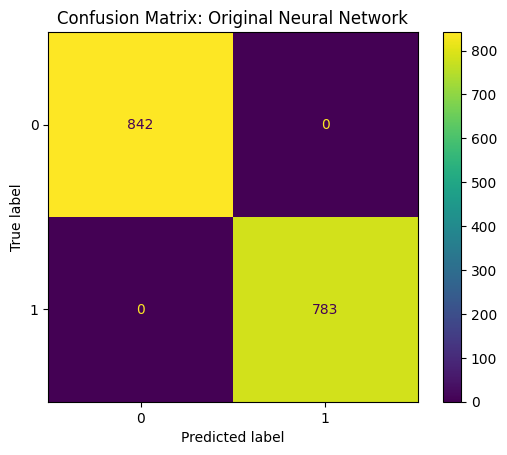

In [10]:
#Evaluate Model
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Manually convert to float32 data type for Tensorflow compatibility
X_train_encoded = X_train_encoded.astype('float32')
X_test_encoded = X_test_encoded.astype('float32')



# Predict Probabilities
y_pred_prob = model.predict(X_test_encoded)

# Round to 0 or 1 for class predictions
y_pred = np.round(y_pred_prob)

# Plot Matrix
ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_pred)
plt.title('Confusion Matrix: Original Neural Network')
plt.show()


In [11]:
# Principal Component Analysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

#Apply PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Check to see how many features we have left compared to orginal count
print("Original feature count:", X_train_encoded.shape[1])
print("PCA-reduced feature count:", X_train_pca.shape[1])


Original feature count: 116
PCA-reduced feature count: 60


In [12]:
%%time
#Train Neural Network w/ PCA Data

#Define model with new dimensions
pca_model = Sequential([
    Dense(16, activation='relu', input_dim=X_train_pca.shape[1]),
    Dense(1, activation='sigmoid')
])

# Compile and Train
pca_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

pca_hist = pca_model.fit(X_train_pca, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
 14/163 [=>............................] - ETA: 0s - loss: 0.3656 - accuracy: 0.8817 

2025-04-25 13:11:26.668318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


163/163 [==============================] - 1s 5ms/step - loss: 0.1814 - accuracy: 0.9663 - val_loss: 0.0667 - val_accuracy: 0.9969
Epoch 2/10
  1/163 [..............................] - ETA: 0s - loss: 0.0635 - accuracy: 1.0000

2025-04-25 13:11:27.362557: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


163/163 [==============================] - 1s 3ms/step - loss: 0.0394 - accuracy: 0.9988 - val_loss: 0.0238 - val_accuracy: 1.0000
Epoch 3/10
163/163 [==============================] - 1s 3ms/step - loss: 0.0161 - accuracy: 0.9996 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 4/10
163/163 [==============================] - 1s 3ms/step - loss: 0.0088 - accuracy: 0.9996 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 5/10
163/163 [==============================] - 1s 3ms/step - loss: 0.0056 - accuracy: 0.9998 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 6/10
163/163 [==============================] - 1s 3ms/step - loss: 0.0040 - accuracy: 0.9998 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 7/10
163/163 [==============================] - 1s 4ms/step - loss: 0.0031 - accuracy: 0.9998 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 8/10
163/163 [==============================] - 1s 3ms/step - loss: 0.0025 - accuracy: 0.9998 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 9/10
163/16

51/51 [==============================] - 0s 1ms/step


2025-04-25 13:11:32.586297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


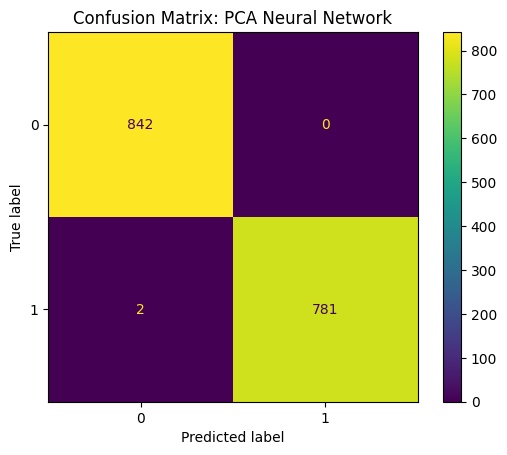

In [13]:
#PCA Model Confusion Matrix

# Predict probabilities
y_pred_pca_prob = pca_model.predict(X_test_pca)

# Round to 0 or 1
y_pred_pca = np.round(y_pred_pca_prob)

# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_pred_pca)
plt.title("Confusion Matrix: PCA Neural Network")
plt.show()

10.
    a.
    After One-Hot encoding the data, there were 116 features. Before encoding the data, there were 22 categorical features. One-Hot Encoding multiplied each categorical feature into multiple columns, resulting in a greater dimensional dataset. The expansion allowed ML models to work more effectively with categorical variables. 

    b.
    There should be 1 output layer for the units parameter. We are assessing for binary classification; is the mushroom edible or poisonous. A single neuron output with sigmoid activation results in probability between 0 and 1 for binary classifications.

   c.
    Input to hidden layer:
       (116+1)x16=1872
    Hidden to output layer:
       (16+1)x1=17
    Total Connections:
       1872+17 = 1889 Total Connections

    d. After dimensionality reduction, there were 60 features in the training data. The encoded data had 116 features, almost twice as many. PCA reduced the features while retaining 95% of the variance and reducing training time.

    e. The input_dim parameter denotes the amount of input features in the network. The number of features changes from 116 to 60, so the input dimension has to be updated accordingly, it needs to match the shape of the PCA-transformed training data.

    f. The original neural network had a training time of 6.50 seconds. About half a second slower than the PCA neural network, 6.17 seconds. The PCA reduced the number of features so it was expected to be more efficient in it's computations and aligns with the expectation that reducing dimensionality improves training efficiency.
   
    

In [14]:
# Export PCA Model
pca_model.save('/Users/patrickforan/DTSC680/mushroom_classification/pca_model')

INFO:tensorflow:Assets written to: /Users/patrickforan/DTSC680/mushroom_classification/pca_model/assets
